<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.8_correlation/stats_corr_corrMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Correlation
# Correlation matrix

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib as matlib

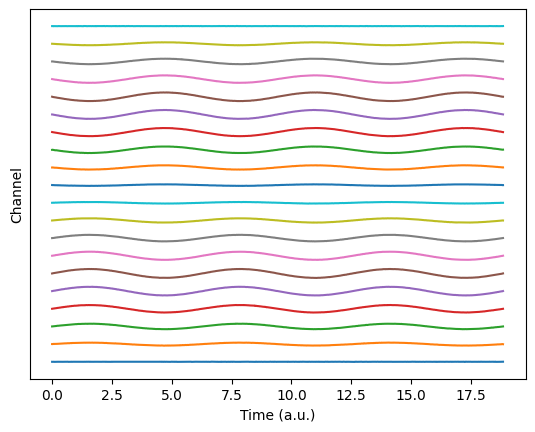

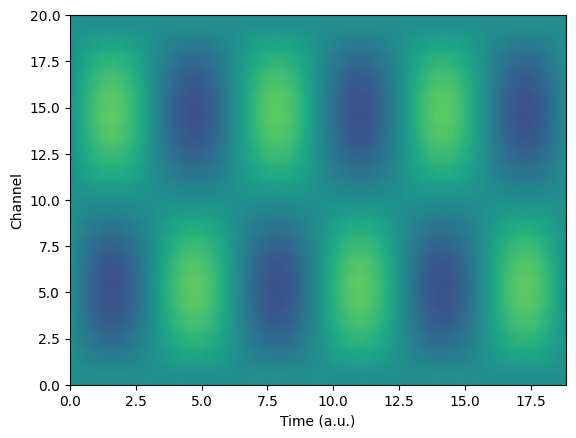

In [2]:
## simulate data

# simulation parameters
N = 1000  # time points
M =   20  # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# create the data
data = np.zeros((M,N))
for mi in range(M):
    data[mi,:] = np.sin(t) * chanrel[mi]

# data = data + np.random.randn(M,N)
data = data + np.random.randn(M,N)/100


# two ways of visualizing the multichannel data
for i in range(M):
    plt.plot(t,data[i,:]+i*4)

plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

plt.imshow(data,aspect='auto',vmin=-2,vmax=2,extent=[t[0],t[-1],0,M])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

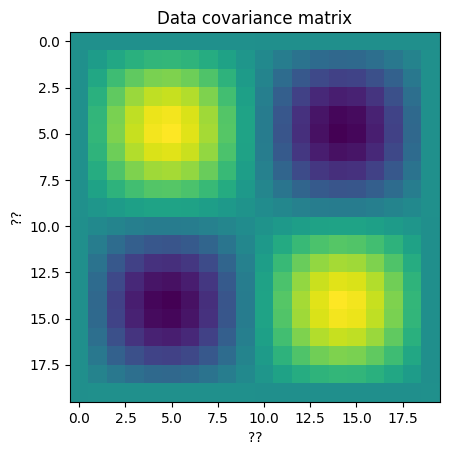

In [3]:
## now compute the covariance matrix

# note the size of the output!

# dataCovMat = np.cov(data.T)
dataCovMat = np.cov(data)

plt.imshow(dataCovMat,vmin=-.5,vmax=.5)
plt.title('Data covariance matrix')
plt.xlabel('??')
plt.ylabel('??')
plt.show()

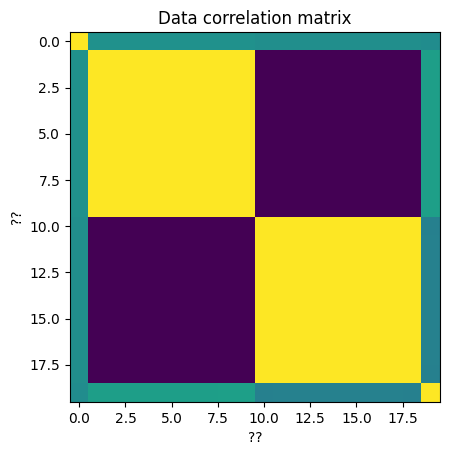

In [4]:
## and now the correlation matrix

# note the size of the output!
dataCorrMat = np.corrcoef(data)

plt.imshow(dataCorrMat,vmin=-.5,vmax=.5)
plt.title('Data correlation matrix')
plt.xlabel('??')
plt.ylabel('??')
plt.show()

---
Average corelation matrices
---

In [5]:
import numpy as np
import matplotlib.pyplot as plt


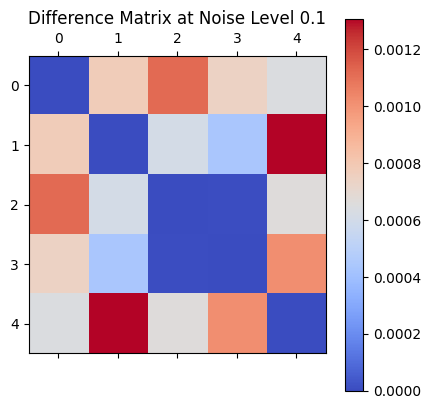

Mean Difference at Noise Level 0.1: 0.0006


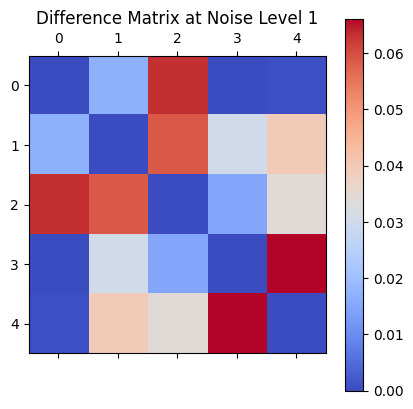

Mean Difference at Noise Level 1: 0.0259


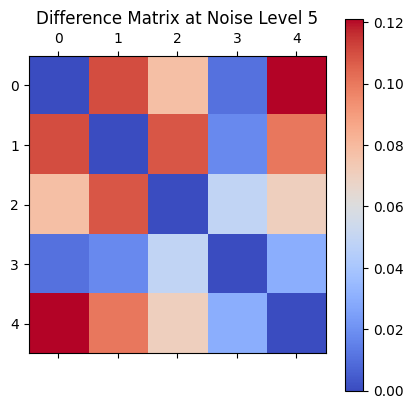

Mean Difference at Noise Level 5: 0.0556


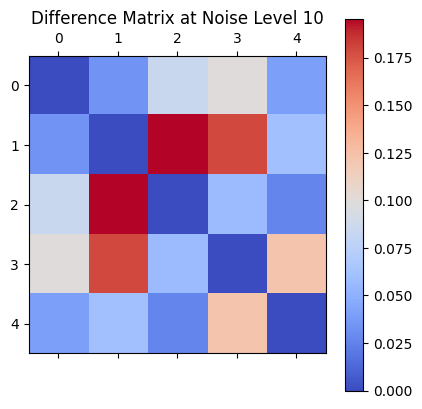

Mean Difference at Noise Level 10: 0.0718


In [6]:

# Parameters
n_samples = 100  # Number of samples in each dataset
n_features = 5   # Number of features (dimensions)
noise_levels = [0.1, 1, 5, 10]  # Different noise levels to experiment with

# Set seed for reproducibility
np.random.seed(0)

# Generate baseline (noiseless) data
baseline_data = np.random.normal(0, 1, (n_samples, n_features))

# Dictionary to store correlation matrices for each noise level
results = {}

# Loop over each noise level
for noise_level in noise_levels:
    # List to store noisy datasets at the current noise level
    datasets = []

    # Generate 20 noisy datasets
    for _ in range(20):
        # Generate noise and scale it by the current noise level
        noise = np.random.normal(0, 1, (n_samples, n_features)) * noise_level
        # Create noisy dataset by adding noise to the baseline data
        noisy_data = baseline_data + noise
        datasets.append(noisy_data)

    # 1. Average the datasets and calculate the correlation matrix
    avg_data = np.mean(datasets, axis=0)
    correlation_matrix_avg_data = np.corrcoef(avg_data, rowvar=False)

    # 2. Calculate the correlation matrix for each dataset individually and then average them
    correlation_matrices = [np.corrcoef(data, rowvar=False) for data in datasets]
    correlation_matrix_avg_corr = np.mean(correlation_matrices, axis=0)

    # Store both correlation matrices in the results dictionary
    results[noise_level] = {
        "correlation_matrix_avg_data": correlation_matrix_avg_data,
        "correlation_matrix_avg_corr": correlation_matrix_avg_corr,
    }

# Function to plot the difference matrix between the two correlation methods
def plot_difference_matrix(matrix1, matrix2, title):
    # Calculate the absolute difference
    difference_matrix = np.abs(matrix1 - matrix2)

    # Plot the difference matrix
    plt.matshow(difference_matrix, cmap='coolwarm')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Plot the difference matrices and compute the mean difference for each noise level
for noise_level in noise_levels:
    matrix_avg_data = results[noise_level]["correlation_matrix_avg_data"]
    matrix_avg_corr = results[noise_level]["correlation_matrix_avg_corr"]

    # Plot difference between averaged data correlation and averaged correlation matrices
    plot_difference_matrix(matrix_avg_data, matrix_avg_corr,
                           title=f"Difference Matrix at Noise Level {noise_level}")

    # Calculate and print the mean difference
    mean_difference = np.mean(np.abs(matrix_avg_data - matrix_avg_corr))
    print(f"Mean Difference at Noise Level {noise_level}: {mean_difference:.4f}")

---
Correlation to covariance matrix
---

In [7]:
import numpy as np


In [12]:

# Step 1: Generate a random dataset with M features and N observations
M = 4  # Number of features
N = 50  # Number of observations
A = np.random.randn(M, N)  # Random dataset with standard normal distribution

# Step 2: Compute the covariance and correlation matrices directly
CovA = np.cov(A)  # Covariance matrix
CorrA = np.corrcoef(A)  # Correlation matrix

# Step 3: Create the diagonal matrix with standard deviations (Sigma)
std_matrix = np.zeros((M, M))  # Initialize an M x M zero matrix
for i in range(M):
    std_matrix[i, i] = np.std(A[i], ddof=1)  # Fill the diagonal with standard deviations

# Step 4: Compute the covariance matrix from the correlation matrix
CovA_rec = std_matrix @ CorrA @ std_matrix  # Reconstructed covariance matrix

# Step 5: Compute the correlation matrix from the covariance matrix
std_inv = np.linalg.inv(std_matrix)  # Inverse of the standard deviation matrix
CorrA_rec = std_inv @ CovA @ std_inv  # Reconstructed correlation matrix

# Step 6: Display results to verify accuracy
print("Original Covariance Matrix (CovA):")
print(CovA)
print("\nReconstructed Covariance Matrix (CovA_rec):")
print(CovA_rec)

print("\nOriginal Correlation Matrix (CorrA):")
print(CorrA)
print("\nReconstructed Correlation Matrix (CorrA_rec):")
print(CorrA_rec)

# Step 7: Verify if matrices match approximately
if np.allclose(CovA, CovA_rec):
    print("\nCovariance matrix reconstruction is verified!")
else:
    print("\nCovariance matrices do not match exactly. Check calculations.")

if np.allclose(CorrA, CorrA_rec):
    print("\nCorrelation matrix reconstruction is verified!")
else:
    print("\nCorrelation matrices do not match exactly. Check calculations.")



Original Covariance Matrix (CovA):
[[ 1.06519751  0.07489107  0.13552316 -0.10625128]
 [ 0.07489107  0.85564291 -0.06159652 -0.19261234]
 [ 0.13552316 -0.06159652  0.81461657  0.06734552]
 [-0.10625128 -0.19261234  0.06734552  1.18765049]]

Reconstructed Covariance Matrix (CovA_rec):
[[ 1.06519751  0.07489107  0.13552316 -0.10625128]
 [ 0.07489107  0.85564291 -0.06159652 -0.19261234]
 [ 0.13552316 -0.06159652  0.81461657  0.06734552]
 [-0.10625128 -0.19261234  0.06734552  1.18765049]]

Original Correlation Matrix (CorrA):
[[ 1.          0.07844562  0.14548621 -0.09446584]
 [ 0.07844562  1.         -0.07377909 -0.19107044]
 [ 0.14548621 -0.07377909  1.          0.06846802]
 [-0.09446584 -0.19107044  0.06846802  1.        ]]

Reconstructed Correlation Matrix (CorrA_rec):
[[ 1.          0.07844562  0.14548621 -0.09446584]
 [ 0.07844562  1.         -0.07377909 -0.19107044]
 [ 0.14548621 -0.07377909  1.          0.06846802]
 [-0.09446584 -0.19107044  0.06846802  1.        ]]

Covariance mat

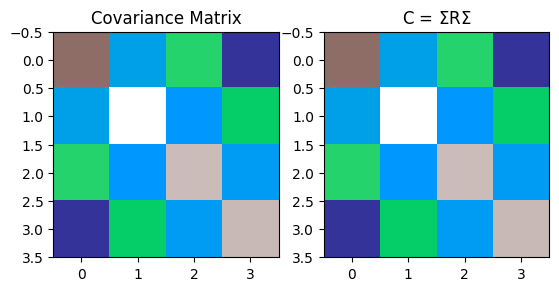

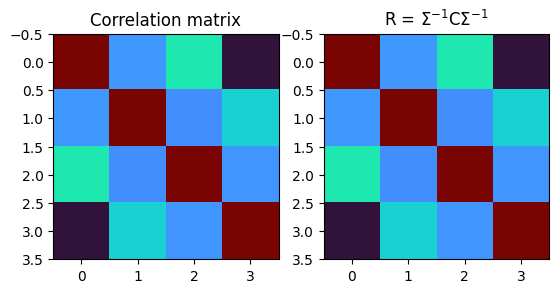

In [11]:
# create random data
M = 4
N = 50
A = np.random.randn(M,N)

# compute covariance and correlation directly
CorrA = np.corrcoef(A)
CovA = np.cov(A)

# compute stds diagonal matrix
std_matrix = np.zeros((M,M))

for i in range(len(A)):
    std = np.std(A[i],ddof=1)
    std_matrix[i,i] = std

# compute covariance from correlation
CovA_rec = std_matrix@CorrA@std_matrix

# compute correlation from covariance
std_inv = np.linalg.inv(std_matrix)
CorrA_rec = std_inv@CovA@std_inv

# plot covariance matrices
plt.subplot(121)
plt.imshow(CovA,cmap='terrain')
plt.title('Covariance Matrix')

plt.subplot(122)
plt.imshow(CovA_rec,cmap='terrain')
plt.title('C = $\Sigma$R$\Sigma$')
plt.show()

# plot correlation matrices
plt.subplot(121)
plt.imshow(CorrA,cmap='turbo')
plt.title('Correlation matrix')

plt.subplot(122)
plt.imshow(CorrA_rec,cmap='turbo')
plt.title('R = $\Sigma^{-1}$C$\Sigma^{-1}$')
plt.show()